In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line



In [3]:
#You may find lines or sections of the following code useful:
def useful_code():
  x_low = 0
  x_high = 2*np.pi
  n_x_values = 30
  #define a set of n_x_values points between x_low and x_high (0 to
  #2 pi in this case):
  x = np.linspace(x_low,x_high,n_x_values)

  #Normalise a vector (i.e. turn it into a unit vector):
  v = np.array([4, 8, 1])
  v_hat = v/np.linalg.norm(v)
  print("Normalised vector: ", v_hat)

  #find the minimum value within vector v:
  print("Minimum of v (should be 1): ", np.min(v))
  #find where the minimum occured - NB zero indexed
  #(NB can also do argmax() for maximum point)
  print("Minimum occurs at element: ", np.argmin(v,axis=0))

  #calculate y values for the given x values, using y = cos(x)
  y = np.cos(x)
  integral = np.trapz(y, x=x) #integrate y using the trapezium rule
  print("Integral (should be approx 0):",integral)

  loc = np.pi #set location to be pi (3.14...)
  #interpolate function y(x) to find value at loc - i.e. y(loc):
  val = np.interp(loc, x, y)
  print("Value at pi (should be approx -1):",val)

  #summing and squaring:
  print("Sum of y squared: ", np.sum(y**2))

  #do a for loop
  for cnt in range(4):
    print("Iteration: ", cnt)

  #Reshape matrix A such that it has the same shape as B:
  A = np.array([[1,2],[3,4]])
  print("A before reshaping:\n",A)
  B = np.array([6,7,8,9])
  print("B:\n",B)
  A = np.reshape(A,B.shape)
  print("A after reshaping to match B:\n",A)

  #Multiply two matrices together:
  A = np.array([[1,2],[3,4]])
  B = np.array([[5,6],[7,8]])
  C = np.matmul(A, B)
  print("Multiplication of \n", A, "\nand\n", B, "\ngives:\n", C)

  #Plotting functions/points:
  fig, ax = plt.subplots()  #define a figure
  #plot the points given by vectors x and y with a blue
  #solid line ('b-'). k is black, r red and g green.
  plt.plot(x, y, 'b-')
  plt.plot(x, y, 'k.')      #as above, but plot as black dots


  #2D plotting and routines:

  #generate two random sets of values x1 and x2
  n_points = 20
  x1 = np.random.normal(loc=0,scale=1,size=n_points)
  x2 = np.random.normal(loc=0,scale=1,size=n_points)
  #Combine two vectors x1 and x2, of length n_points, into
  # a matrix of size n_points x 2
  X = np.concatenate((np.reshape(x1,[n_points,1]),
                      np.reshape(x2,[n_points,1])),axis=1)

  y = np.zeros([n_points]) #define y and set all values to zero
  #now put all the class values to 1 where the x1 value is
  # greater than 0.2
  y[x1 > 0.2] = 1

  #points in x and y:
  npx = 200
  npy = 200
  #generate the grid to sample 2D space:
  Xgrid,x1line,x2line = gen_sample_grid(npx,npy,3)
  #generate an arbitrary 2D function - here do x1^2 + x2:
  z = Xgrid[:,0]**2+Xgrid[:,1]
  #and reshape it back to the grid
  z = z.reshape([npx,npy])
  fig, ax = plt.subplots()
  #plot the values in z sampled at values given by the
  #vectors x1line, x2line:
  plt.contourf(x1line, x2line, z)
  #plot scattered values in the n_points x 2 matrix X where
  #corresponding values in the y vector equal 0:
  ax.scatter(X[y == 0, 0], X[y == 0, 1])
  #then plot where y == 1:
  ax.scatter(X[y == 1, 0], X[y == 1, 1])

#uncomment to run the code if you wish:
#useful_code()

#Q1

0.30612244897959184
0.44897959183673475
0.24489795918367346


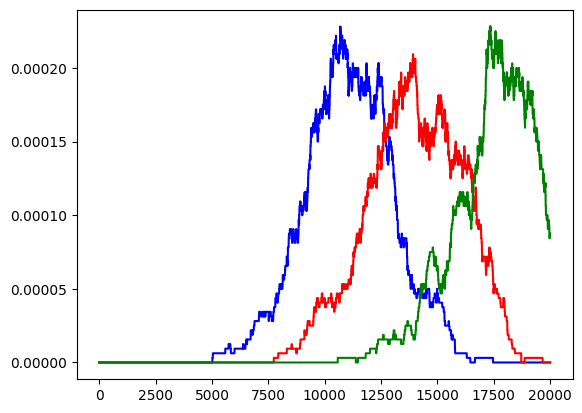

In [4]:
#Q1:

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d1.csv")
a = np.array(df['a'])
b = np.array(df['b'])
c = np.array(df['c'])

n_points = a.size

##

halfwidth = 800/2
n_x_vals = 20000

x = np.linspace(0,20000,n_x_vals)
tota = np.zeros(x.shape)
totb = np.zeros(x.shape)
totc = np.zeros(x.shape)
for cnt in range(n_points):
  for pos in range(n_x_vals):
    if x[pos] > a[cnt] - halfwidth and x[pos] < a[cnt] + halfwidth:
      tota[pos] = tota[pos] + 1
    if x[pos] > b[cnt] - halfwidth and x[pos] < b[cnt] + halfwidth:
      totb[pos] = totb[pos] + 1

    if c[cnt] - halfwidth < x[pos] < c[cnt] + halfwidth:
      totc[pos] = totc[pos] + 1

pa = tota/n_points/(halfwidth*2)
pb = totb/n_points/(halfwidth*2)
pc = totc/n_points/(halfwidth*2)

#integral = np.trapz(pa, x=x)
#print(integral) #can double check it integrates to 1

fig, ax = plt.subplots()
plt.plot(x, pa,'b-')
plt.plot(x, pb,'r-')
plt.plot(x, pc,'g-')

#(b):

#part fails at 15000km
Pxw1 = np.interp(15000,x,pa)
Pxw2 = np.interp(15000,x,pb)
Pxw3 = np.interp(15000,x,pc)

Pw1 = 0.5
Pw2 = 0.2
Pw3 = 0.3

Px = Pxw1*Pw1 + Pxw2*Pw2 + Pxw3*Pw3

Pw1x = Pxw1*Pw1/Px
Pw2x = Pxw2*Pw2/Px
Pw3x = Pxw3*Pw3/Px

print(Pw1x)
print(Pw2x)
print(Pw3x)


#Q2
(a) The sound metric will be zero.

(b) The property is that of reflexivity.

#Q3

0.3077600255541997


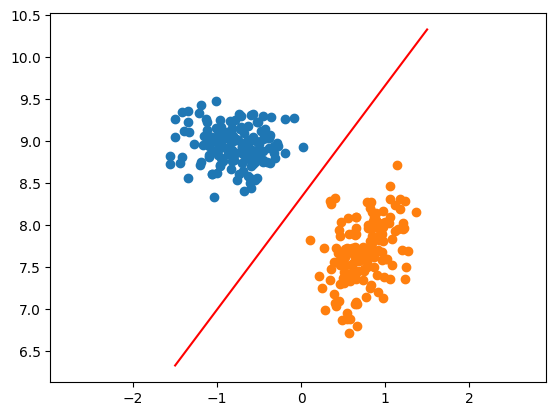

In [10]:
#Q3:

w = np.array([0.8, -0.6])
w0 = 5

df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d3.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])

n_points = x1.size


fig, ax = plt.subplots()
ax.scatter(x1[y == -1], x2[y == -1])
ax.scatter(x1[y == 1], x2[y == 1])

x1s = np.linspace(-1.5,1.5,200)
x2s = (-w0-w[0]*x1s)/w[1]
ax.plot(x1s,x2s,'k-')
ax.axis('equal')


w = np.reshape(w,[2,1])

X = np.concatenate((np.reshape(x1,[n_points,1]),np.reshape(x2,[n_points,1])),axis=1) ###

g = np.matmul(w.T,X.T).T+w0

y = np.reshape(y,g.shape)
marg = np.min(y*g)
print(marg)


#Q4
Nothing can be concluded about the general performance. The bias will be reduced by fitting the training data better, but it is unclear whether the RBFs will lead to the model overfitting the training dataset more, causing the variance to be higher, and contributing to the total error being larger.



#Q5

[-0.26332649 -0.89562782]


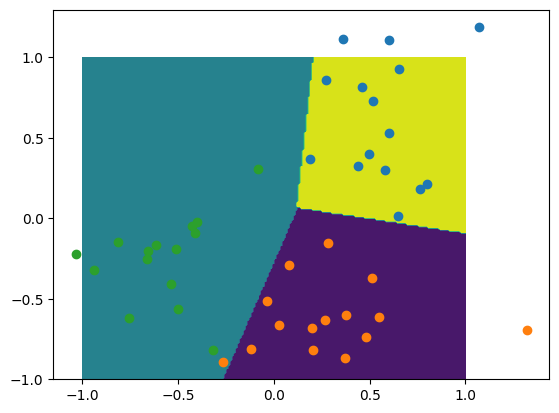

In [6]:
#Q5

df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d5.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])

n_points = y.size


X = np.concatenate((np.reshape(x1,[n_points,1]),np.reshape(x2,[n_points,1])),axis=1)


w1 = np.array([[0.1, -1]])
w01 = 0.1
w2 = np.array([[-4, 0.5]])
w02 = 0.5
w3 = np.array([[0.3, 0.1]])
w03 = 0



g1 = np.matmul(w1, X.T) + w01
g2 = np.matmul(w2, X.T) + w02
g3 = np.matmul(w3, X.T) + w03
gconc = np.concatenate([g1, g2, g3])
omega=np.argmax(gconc,axis=0)
#^ can also do this as a for loop

for check in range(n_points):
  if y[check] != omega[check]:
    print(X[check,:])


#Can visualise it too:
npx = 200
npy = 200

Xgrid,x1line,x2line = gen_sample_grid(200,200,1)

g1 = np.matmul(w1, Xgrid.T) + w01
g2 = np.matmul(w2, Xgrid.T) + w02
g3 = np.matmul(w3, Xgrid.T) + w03

gconc = np.concatenate([g1, g2, g3])
omega=np.argmax(gconc,axis=0)

#put back onto 2D grid so it can easily be plotted
omega = np.reshape(omega, [npx, npy])

fig, ax = plt.subplots()
plt.contourf(x1line, x2line, omega)

ax.scatter(X[y == 2, 0], X[y == 2, 1])
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])


#Q6

[-1.0964548574994768, 1.99773855537348, 1.9977755786366316]


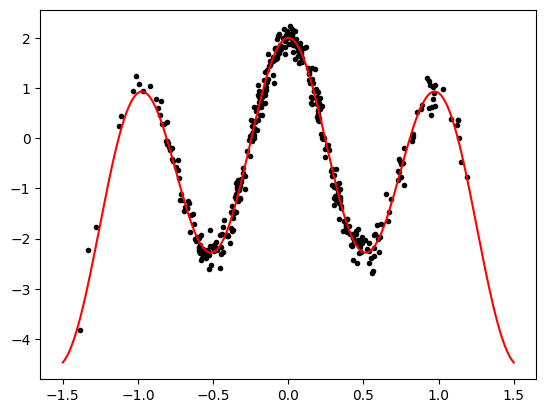

In [7]:
df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d6.csv")
x = np.array(df['x'])
y = np.array(df['y'])

n_points = y.size


Acur = -2
Bcur = 0
Ccur = 2.5

step = 0.0005

for cnt in range(40):
  r = y - (Acur*x**2 + Bcur * np.cos(Ccur*np.pi*x))

  C = np.sum(r**2)
  #print(C)
  drida = -x**2
  dridb = -np.cos(Ccur*np.pi*x)
  dridc = +Bcur * np.sin(Ccur*np.pi*x)*np.pi*x
  dCda = np.sum(2*r*drida)
  dCdb = np.sum(2*r*dridb)
  dCdc = np.sum(2*r*dridc)

  Acur = Acur - step * dCda
  Bcur = Bcur - step * dCdb
  Ccur = Ccur - step * dCdc

print([Acur,Bcur,Ccur])

xsamp = np.linspace(-1.5, 1.5, 200)
ysamp = (Acur*xsamp**2 + Bcur * np.cos(Ccur*np.pi*xsamp))

fig, ax = plt.subplots()
plt.plot(x,y,'k.')
plt.plot(xsamp,ysamp,'r-')


#Q7

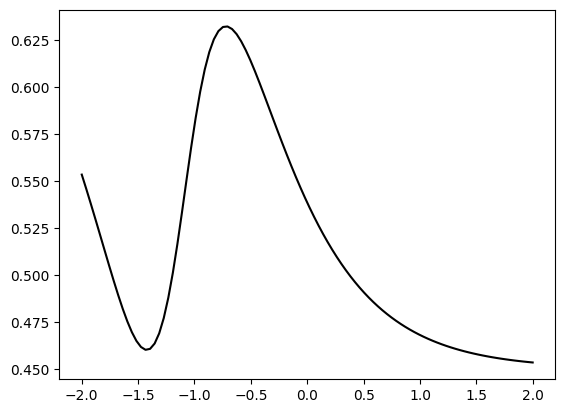

In [8]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.linspace(-2, 2, 100)

#net11 = 6.5 + -6*x
net11 = 6.5 + 6*x
net12 = 2 + 1.7*x

y1 = sigmoid(net11)
y2 = sigmoid(net12)

net2 = 0.8 + 2*y1 - 3*y2
z = sigmoid(net2)

fig, ax = plt.subplots()
plt.plot(x,z,'k-')
#can also plot the intermediate nodal values
#plt.plot(x,y1,'b-')
#plt.plot(x,y2,'r-')
